# Experiment 2 - Larger Scale Network

For the second experiment we wish to see how the models perform in a larger scale environment with multiple medical centers and a more realistic number of agents that you might find in a small town.

See recipe 3 for details

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import pandas as pd


In [3]:
# Modify path to find code directory:
import sys
sys.path.append('../code/')


In [4]:
from structures import *
from datasets import Dataset


## Build the Network and Set up Environment

In [5]:
# Build agents from recipe:
Agent.reset()  # Reset IDs to zero.
ds = Dataset(seed=182)
ds.recipe3()
table = ds.build_agent_table()
display(table.head())

# Build environment:
ds.build_environment(
    transition_model = 'reachable',  # Set defaults models.
    policy_model = 'random_policy',  # (Can override them when calling build_* directly.)
    intervention_size=1,
)
env = ds.env
print(env)


,agent_id,workplace_id,specialty_id,inner_circle,inner_circle_size,outer_circle,outer_circle_size,informed_init,receptivity,persuasiveness
0,0,1,4,4,1,2;7;8,3,0,0.26,0.31
1,1,1,1,1,1,0;3;8,3,0,0.44,0.45
2,2,1,1,7,1,0,1,0,0.44,0.32
3,3,1,4,1,1,6,1,0,0.23,0.48
4,4,1,6,6,1,3;7,2,0,0.17,0.09


<Environment with 0/55 informed agents>


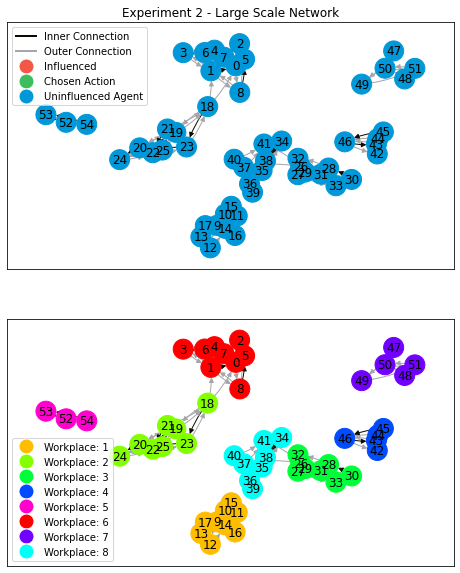

In [6]:
fig, axs = plt.subplots(2,1, figsize=(8,10))
ax0 = env.plot_network_graph(iterations=20, labels=False, colors="influence", rebuild=True, legend=True, seed=82, ax = axs[0])
ax1 = env.plot_network_graph(iterations=20, labels=False, colors="workplace", rebuild=True, legend=True, seed=82, ax = axs[1])
ax0.set_title("Experiment 2 - Large Scale Network")
plt.show()


### Set up Simulation Parameters

In [7]:
number_of_simulations = 1000
steps_between_influence = 6
simulation_steps = 50


### Method 1 - Totally Random Choice

In [8]:
# Build the policy - start with nobody influenced
env.build_policy(model='random_policy', n_selected=1)

m1_scores = []
# Run N simulations to get an average score
for _ in range(number_of_simulations):
    final_state = env.simulate_steps(n_steps=simulation_steps, dry_run=True, action_schedule=steps_between_influence, seed=None)[-1]
    score = final_state.n_informed
    m1_scores.append(score)

m1_score = np.mean(m1_scores)
print(f"Average Score for M1: {m1_score}")


Average Score for M1: 22.96


### Method 2 - Random Uninfluenced Agents

In [9]:
# Build the policy - start with nobody influenced
env.build_policy(model='random_useful_policy', n_selected=1)

m2_scores = []
# Run N simulations to get an average score
for _ in range(number_of_simulations):
    final_state = env.simulate_steps(n_steps=simulation_steps, dry_run=True, action_schedule=steps_between_influence, seed=None)[-1]
    score = final_state.n_informed
    m2_scores.append(score)

m2_score = np.mean(m2_scores)
print(f"Average Score for M2: {m2_score}")


Average Score for M2: 25.63


### Method 3 - Degree Centrality

In [10]:
# Build the policy - start with nobody influenced
env.build_policy(model='degree_centrality', n_selected=1)

m3_scores = []
# Run N simulations to get an average score
for _ in range(number_of_simulations):
    final_state = env.simulate_steps(n_steps=simulation_steps, dry_run=True, action_schedule=steps_between_influence, seed=None)[-1]
    score = final_state.n_informed
    m3_scores.append(score)

m3_score = np.mean(m3_scores)
print(f"Average Score for M3: {m3_score}")


Average Score for M3: 28.59


### Method 4 - Policy Iteration

NOT IMPLEMENTED - Not performant enought to run in this example

In [11]:
# # Build the policy - start with nobody influenced
# env.build_transition_matrix(model='reachable', n_selected=1)
# env.build_policy(model='policy_iteration')

# m4_scores = []
# # Run N simulations to get an average score
# for _ in range(number_of_simulations):
#     final_state = env.simulate_steps(n_steps=simulation_steps, dry_run=True, action_schedule=steps_between_influence, seed=None)[-1]
#     score = final_state.n_informed
#     m4_scores.append(score)

# m4_score = np.mean(m4_scores)
# print(f"Average Score for M4: {m4_score}")


### Method 5 - Hierarchical Policy Iteration

In [12]:
# Build the policy - start with nobody influenced
env.build_policy(model='hierarchical_policy_iteration', n_selected=1)

m5_scores = []
# Run N simulations to get an average score
for _ in range(number_of_simulations):
    final_state = env.simulate_steps(n_steps=simulation_steps, dry_run=True, action_schedule=steps_between_influence, seed=None)[-1]
    score = final_state.n_informed
    m5_scores.append(score)

m5_score = np.mean(m5_scores)
print(f"Average Score for M4: {m5_score}")


Building optimal policy for partition 1.
    Initialized sub-problem with 0/9 informed agents.
    Built transition matrix with 512 states and 10 actions.
20 iterations run - max delta = 0.008627961304983112
    Performed policy iteration (4 policy steps, 33 value steps).

Building optimal policy for partition 2.
    Initialized sub-problem with 0/9 informed agents.
    Built transition matrix with 512 states and 10 actions.
20 iterations run - max delta = 0.009334576239829362
    Performed policy iteration (5 policy steps, 34 value steps).

Building optimal policy for partition 3.
    Initialized sub-problem with 0/8 informed agents.
    Built transition matrix with 256 states and 9 actions.
    Performed policy iteration (4 policy steps, 31 value steps).

Building optimal policy for partition 4.
    Initialized sub-problem with 0/8 informed agents.
    Built transition matrix with 256 states and 9 actions.
    Performed policy iteration (4 policy steps, 30 value steps).

Building op

## Plot Results

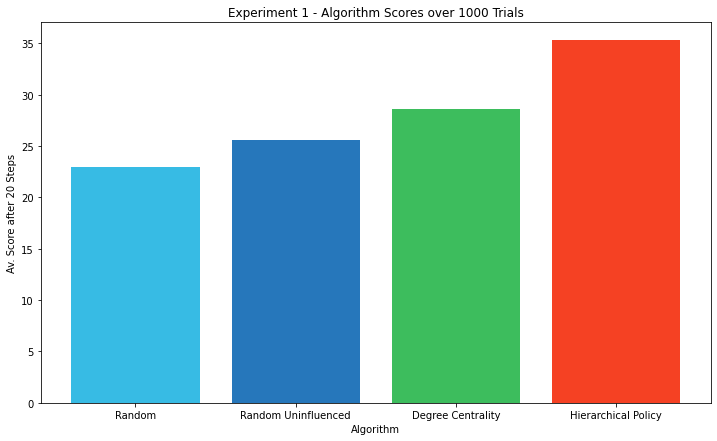

In [13]:
test_scores = [m1_score, m2_score, m3_score, m5_score]
colors = ['#37bbe4','#2677bb','#3dbd5d','#f54123']
bar_labels = ['Random','Random Uninfluenced','Degree Centrality','Hierarchical Policy']

plt.figure(figsize=(12,7))
plt.bar(bar_labels, test_scores, color=colors)
plt.xlabel("Algorithm")
plt.ylabel("Av. Score after 20 Steps")
plt.title("Experiment 1 - Algorithm Scores over 1000 Trials")
plt.show()
